<a href="https://colab.research.google.com/github/elibtronic/2025_state_of_scholarly_communication/blob/main/2025_SofSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 2025 State of Scholarly Communication

Uses OpenAlex data based on pub year and ROR on record
Augmented with Policy Finder Data



In [1]:
import requests
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import seaborn as sns
from datetime import datetime
from google.colab import files

#Set graph colors
colors = sns.color_palette('inferno_r')
color = sns.color_palette('inferno_r')[0]


# @markdown ## OpenAlex Settings

mailto = "tribaric@brocku.ca"  # @param {type:"string"}

ror_id     = "056am2717"  # @param {type:"string"}
from_publication_date = "2024-07-01"  # @param {type:"date"}
to_publication_date = "2025-06-30"  # @param {type:"date"}

# @markdown ## Policy Finder API Settings

pf_key = "" # @param {"type":"string"}

filter = f"authorships.institutions.ror:{ror_id},from_publication_date:{from_publication_date},to_publication_date:{to_publication_date},type:article,primary_location.source.type:journal"
api_url = f"https://api.openalex.org/works?filter={filter}&per-page=200&mailto={mailto}"

cursor = "*"  # Cursor for the first request
works = []  # List to accumulate all results

while cursor:
    # Construct the request URL with the current cursor
    request_url = api_url + f"&cursor={cursor}"

    # Get results from the API
    page = requests.get(request_url).json()
    results = page.get('results')
    meta = page.get('meta')

    # Accumulate results
    works += results

    # Get the next cursor from the current results
    cursor = meta.get('next_cursor')

    # Print progress
    total = int(meta.get("count"))
    #print(f"\r{len(works)}/{total}: {request_url}", end="")

# Do something with all results
print(f"\nTotal works: {len(works)}")


Total works: 670


## Open Alex Data Fetch

Extracts
- ORCID of first Brock Author (assuming this is the most important author)
- author postion
- ORCID of corresponding author or 'none' if not CA is listed
- Publication Date
- DOI of piece
- Item already Open Access?
- ISSN of piece
- source of item
- publisher of item

Still to do


In [2]:
orcid_list = []
author_pos_list = []
corresponding_author_list = []
pub_date_list = []
doi_list = []
issn_list = []
already_oa_list = []
oa_status_list = []
source_list = []
publisher_list = []


for work in works:
  doi_list.append(work['doi'])

  orcid = ""
  for author in work['authorships']:

    for intst in author['institutions']:
      if (intst['ror'] == "https://ror.org/"+ror_id) and orcid == "":
        orcid = author['author']['orcid']
        author_pos = author['author_position']
        break
  author_pos_list.append(author_pos)
  orcid_list.append(orcid)

  #Has at least one corresponding author and write it in if true
  corresponding_author = ""
  for author in work['authorships']:
    if author['is_corresponding'] == True:
      corresponding_author = author['author']['orcid']

  if corresponding_author == "":
    corresponding_author = "none"

  corresponding_author_list.append(corresponding_author)

  try:
    issn = work['primary_location']['source']['issn'][0]
  except:
    issn = ""
  issn_list.append(issn)

  try:
    pub_date = work['publication_date']
  except:
    pub_date = ""
  pub_date_list.append(pub_date)

  if work['open_access']['is_oa'] == True:
    already_oa = "yes"
  else:
    already_oa = "no"
  already_oa_list.append(already_oa)

  try:
    oa_status = work['open_access']['oa_status']
  except:
    oa_status = ""
  oa_status_list.append(oa_status)

  try:
    source = work['primary_location']['source']['display_name']
  except:
    source = ""
  source_list.append(source)

  try:
    publisher = work['primary_location']['source']['host_organization_name']
  except:
    publisher = ""
  publisher_list.append(publisher)


  df = pd.DataFrame(list(zip(orcid_list, author_pos_list, corresponding_author_list, pub_date_list,doi_list,already_oa_list,oa_status_list,issn_list,source_list,publisher_list)), columns =['ORCID','author_position','corresponding_author','pub_date','DOI','already_oa','oa_status','issn','source','publisher'])

In [3]:
df.sample(10)

,ORCID,author_position,corresponding_author,pub_date,DOI,already_oa,oa_status,issn,source,publisher
5,https://orcid.org/0000-0002-8238-9560,middle,none,2025-02-01,https://doi.org/10.1016/j.jbc.2025.108327,yes,gold,0021-9258,Journal of Biological Chemistry,Elsevier BV
571,https://orcid.org/0000-0001-6987-4855,first,https://orcid.org/0000-0001-6987-4855,2024-10-19,https://doi.org/10.1007/s10878-024-01207-w,no,closed,1382-6905,Journal of Combinatorial Optimization,Springer Science+Business Media
267,https://orcid.org/0000-0002-3913-9961,middle,none,2025-05-09,https://doi.org/10.3389/fvets.2025.1592569,yes,gold,2297-1769,Frontiers in Veterinary Science,Frontiers Media
225,https://orcid.org/0000-0002-3021-7062,first,none,2025-03-28,https://doi.org/10.1103/physrevmaterials.9.036201,no,closed,2475-9953,Physical Review Materials,American Physical Society
316,https://orcid.org/0000-0001-5894-0300,first,none,2025-05-01,https://doi.org/10.1152/physiol.2025.40.s1.0583,no,closed,1548-9221,Physiology,American Physiological Society
274,https://orcid.org/0000-0002-6591-6760,middle,none,2025-05-01,https://doi.org/10.1016/j.cbpa.2025.111880,no,closed,1095-6433,Comparative Biochemistry and Physiology Part A...,Elsevier BV
528,https://orcid.org/0000-0002-8298-1986,middle,https://orcid.org/0000-0001-9739-7208,2024-08-28,https://doi.org/10.3390/su16177451,yes,gold,2071-1050,Sustainability,Multidisciplinary Digital Publishing Institute
611,None,first,https://orcid.org/0000-0002-2239-0818,2024-12-17,https://doi.org/10.1021/acs.orglett.4c04160,no,closed,1523-7052,Organic Letters,American Chemical Society
111,https://orcid.org/0000-0001-8418-449X,first,none,2025-04-01,https://doi.org/10.14814/phy2.70299,yes,gold,2051-817X,Physiological Reports,Wiley
270,https://orcid.org/0000-0003-0789-2729,first,none,2025-05-13,https://doi.org/10.1111/bjso.12900,yes,hybrid,0144-6665,British Journal of Social Psychology,Wiley


## Policy Finder

Grabs associated Policy Finder policy for ISSN of DOI

In [4]:
#As there is no Python wrapper for this API, I'll make a function
#that will use requests to grab the JSON
def pf_fetch(pf_key,issn):
  '''Returns JSON from Policy Finder given an ISSN and API Key'''
  paip_options = {
      "item-type" : "publication",
      "api-key" : pf_key,
      "format" : "Json",
  }

  paip_options['identifier'] = issn

  requests.packages.urllib3.disable_warnings()
  api_blob = requests.get("https://v2.sherpa.ac.uk/cgi/retrieve_by_id",params=paip_options,verify=False).json()

  if api_blob['items'] == []:
    return None
  else:
    return api_blob['items'][0]

In [5]:
list_uri = []
list_submitted_oa_policy = []
list_accepted_oa_policy = []
list_published_oa_policy = []
prog = 0

print("Retrieving PolicyFinder data for ", len(df), " DOIs")

for key, value in df.iterrows():

  #some low-fi progress feedback
  prog += 1
  if prog % 50 == 0:
    print(str(prog)+"..", end = "")
  if prog % 500 == 0:
    print("\n")

  if value['issn'] == "":
    #print("no issn")
    list_uri.append("None")
    list_submitted_oa_policy.append("None")
    list_accepted_oa_policy.append("None")
    list_published_oa_policy.append("None")
  else:
    #print(value['issn'])
    par = pf_fetch(pf_key,value['issn'])

    #No policy found in otherwords
    if par == None:
      list_uri.append("None")
      list_submitted_oa_policy.append("None")
      list_accepted_oa_policy.append("None")
      list_published_oa_policy.append("None")
    else:
      policy_uri = par['system_metadata']['uri']
      accepted_oa_policy = ""
      published_oa_policy = ""
      submitted_oa_policy = ""
      for pub_policy in par['publisher_policy']:
        for per_oa in pub_policy['permitted_oa']:
          try:
            #Only keep ones that have IR as option, for first pass
            if 'institutional_repository' in per_oa['location']['location']:
              #accepted policy first
              if per_oa['article_version'][0] == 'accepted':
                try:
                  conditions_text = " ".join(per_oa['conditions'])
                except:
                  conditions_text = "no conditions"
                if per_oa['additional_oa_fee'] == "no":
                  fee_text = "fee_no"
                else:
                  fee_text = "fee_yes"
                per_id = str(per_oa['id'])
                accepted_oa_policy += per_id+":"+fee_text+":"+conditions_text+";"

              #published
              elif per_oa['article_version'][0] == 'published':
                try:
                  conditions_text = " ".join(per_oa['conditions'])
                except:
                  conditions_text = "no conditions"
                if per_oa['additional_oa_fee'] == "no":
                  fee_text = "fee_no"
                else:
                  fee_text = "fee_yes"
                per_id = str(per_oa['id']).strip()
                published_oa_policy += per_id+":"+fee_text+":"+conditions_text+";"

              #submitted
              elif per_oa['article_version'][0] == 'submitted':
                try:
                  conditions_text = " ".join(per_oa['conditions'])
                except:
                  conditions_text = "no conditions"
                if per_oa['additional_oa_fee'] == "no":
                  fee_text = "fee_no"
                else:
                  fee_text = "fee_yes"
                per_id = str(per_oa['id']).strip()
                submitted_oa_policy += per_id+":"+fee_text+":"+conditions_text+";"
          except: #on occasion it error out totally
            #print("error")
            policy_uri = "error"
            accepted_oa_policy = "error"
            published_oa_policy = "error"
            submitted_oa_policy = "error"

        if submitted_oa_policy == "":
          submitted_oa_policy = "None"
        if accepted_oa_policy == "":
          accepted_oa_policy = "None"
        if published_oa_policy == "":
          published_oa_policy = "None"

      #print("\n")
      #print(policy_uri)
      list_uri.append(policy_uri)
      #print(submitted_oa_policy)
      list_submitted_oa_policy.append(submitted_oa_policy)
      #print(accepted_oa_policy)
      list_accepted_oa_policy.append(accepted_oa_policy)
      #print(published_oa_policy)
      list_published_oa_policy.append(published_oa_policy)

# add these new columns to the df
df['policy_uri'] = list_uri
df['submitted_oa_policy'] = list_submitted_oa_policy
df['accepted_oa_policy'] = list_accepted_oa_policy
df['published_oa_policy'] = list_published_oa_policy

print("\nDone retrieving PolicyFinder data.")

Retrieving PolicyFinder data for  670  DOIs
50..100..150..200..250..300..350..400..450..500..

550..600..650..
Done retrieving PolicyFinder data.


In [6]:
df.sample(10)

,ORCID,author_position,corresponding_author,pub_date,DOI,already_oa,oa_status,issn,source,publisher,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
632,https://orcid.org/0000-0002-7274-4645,first,none,2024-07-09,https://doi.org/10.5465/amproc.2024.13372abstract,no,closed,0065-0668,Academy of Management Proceedings,Academy of Management,None,None,None,None
54,https://orcid.org/0000-0002-3622-1548,middle,https://orcid.org/0000-0003-0231-3142,2025-01-15,https://doi.org/10.3390/rs17020289,yes,gold,2072-4292,Remote Sensing,Multidisciplinary Digital Publishing Institute,https://v2.sherpa.ac.uk/id/publication/13675,None,None,None
415,https://orcid.org/0000-0002-4214-8543,last,none,2024-08-01,https://doi.org/10.1152/japplphysiol.00403.2024,no,closed,1522-1601,Journal of Applied Physiology,American Physiological Society,https://v2.sherpa.ac.uk/id/publication/23791,None,None,None
178,https://orcid.org/0000-0002-8062-7123,middle,none,2025-01-23,https://doi.org/10.1108/ejm-12-2023-0911,no,closed,0309-0566,European Journal of Marketing,Emerald Publishing Limited,https://v2.sherpa.ac.uk/id/publication/189,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,None
128,None,first,None,2024-07-24,https://doi.org/10.3389/fdpys.2024.1419756,yes,diamond,2813-7779,Frontiers in Developmental Psychology,Frontiers Media,https://v2.sherpa.ac.uk/id/publication/44579,None,None,None
215,None,last,none,2025-01-01,https://doi.org/10.1123/jsm.2024-0269,no,closed,0888-4773,Journal of Sport Management,Human Kinetics,https://v2.sherpa.ac.uk/id/publication/12254,None,3849:fee_no:Publisher copyright and source mus...,None
597,None,first,none,2024-11-25,https://doi.org/10.24095/hpcdp.44.11/12.01,no,closed,2368-738X,Health Promotion and Chronic Disease Preventio...,Public Health Agency of Canada,None,None,None,None
45,https://orcid.org/0000-0003-0925-611X,first,https://orcid.org/0000-0003-4671-7843,2024-07-30,https://doi.org/10.1038/s44159-024-00341-w,no,closed,2731-0574,Nature Reviews Psychology,Nature Portfolio,https://v2.sherpa.ac.uk/id/publication/46230,8170:fee_no:no conditions;,87:fee_no:Must link to publisher version Publi...,None
512,https://orcid.org/0000-0002-0542-6911,first,https://orcid.org/0000-0002-0542-6911,2024-07-24,https://doi.org/10.3389/fpubh.2024.1406911,yes,gold,2296-2565,Frontiers in Public Health,Frontiers Media,https://v2.sherpa.ac.uk/id/publication/26087,None,None,None
156,https://orcid.org/0000-0002-0250-2210,middle,none,2024-11-12,https://doi.org/10.1016/j.rse.2024.114494,no,closed,0034-4257,Remote Sensing of Environment,Elsevier BV,https://v2.sherpa.ac.uk/id/publication/15486,None,11157:fee_no:Must link to publisher version wi...,11159:fee_yes:Published source must be acknowl...


# Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

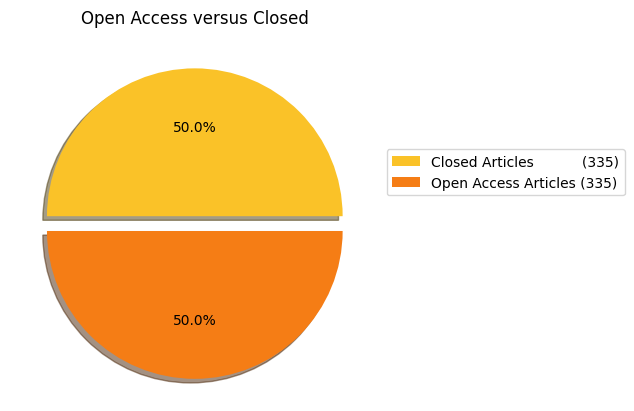

In [7]:
#Total Versus OA as pie

not_oa = df['already_oa'].value_counts()['no']
oa = df['already_oa'].value_counts()['yes']
explode = (0, 0.1)
legend = ["Closed Articles           ("+str(not_oa)+")","Open Access Articles ("+str(oa)+")"]

plt.pie([not_oa,oa],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(1.0,0.7))
plt.title("Open Access versus Closed")

figname = "Open_Access_versus_Closed.png"
plt.savefig(figname, bbox_inches='tight')
files.download(figname)
plt.show()

(0.1, 0.0, 0.0, 0.0, 0.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

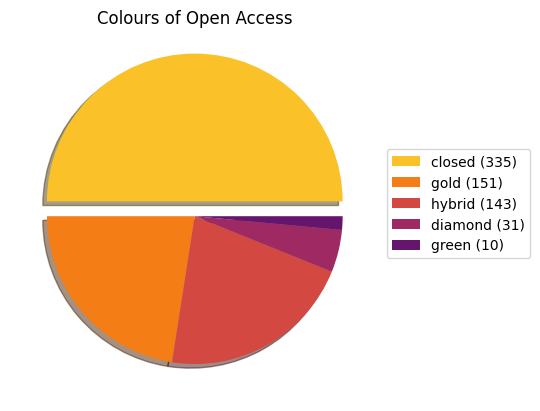

In [24]:
#colors of OA as pie

oa_colors = df['oa_status'].value_counts().values
legend = df['oa_status'].value_counts().index
legend = ['%s (%1d)' % (l, s) for l, s in zip(df['oa_status'].value_counts().index, df['oa_status'].value_counts().values)]

explode = list((0.0,) * len(df['oa_status'].value_counts().index))
explode[0] = 0.1
explode = tuple(explode)


plt.pie(oa_colors,shadow=True, explode=explode, startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(1.0,0.7))
plt.title("Colours of Open Access")

figname = "Colours_of_Open_Access.png"
plt.savefig(figname, bbox_inches='tight')
files.download(figname)

plt.show()



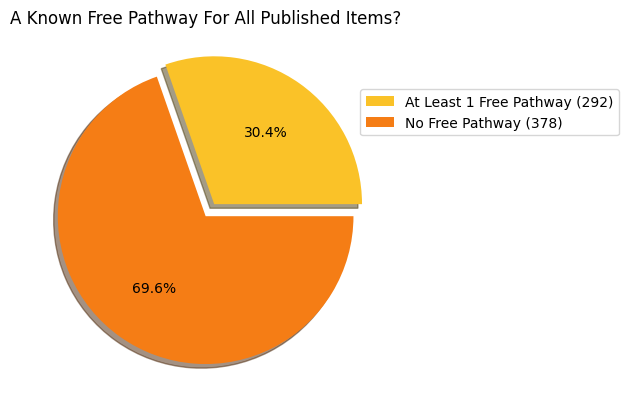

In [9]:
#Articles with at least 1 free pathway

least_one_free_pathway = len(df[df['submitted_oa_policy'].str.contains('fee_no', case=False) \
                                | df['accepted_oa_policy'].str.contains('fee_no', case=False) \
                                | df['published_oa_policy'].str.contains('fee_no', case=False)])
total = len(df)

legend = ["At Least 1 Free Pathway ("+str(least_one_free_pathway)+")","No Free Pathway ("+str(total-least_one_free_pathway)+")"]
explode = (0.1, 0.0)
plt.pie([least_one_free_pathway,total],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.9,0.7))
plt.title("A Known Free Pathway For All Published Items?")

figname = "One_Free_Pathway.png"
plt.savefig(figname, bbox_inches='tight')
#files.download(figname)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

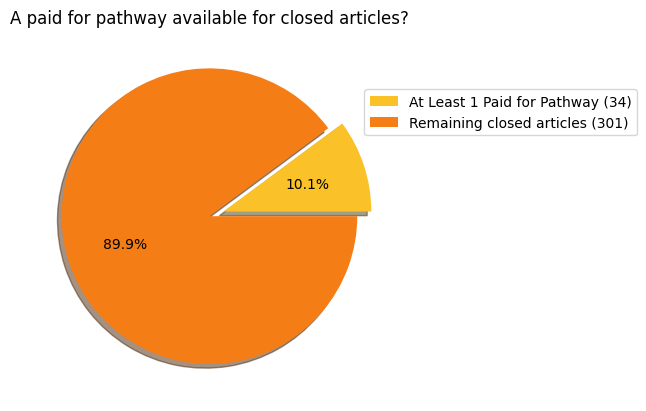

In [10]:
#For close articles, free, paid for other pathway
closed_articles = df[df['already_oa'] == 'no']

least_one_paid_pathway = len(closed_articles[closed_articles['submitted_oa_policy'].str.contains('fee_yes', case=False) \
                                | closed_articles['accepted_oa_policy'].str.contains('fee_yes', case=False) \
                                | closed_articles['published_oa_policy'].str.contains('fee_yes', case=False)])

total_remaining_closed = len(closed_articles) - least_one_paid_pathway

legend = ["At Least 1 Paid for Pathway ("+str(least_one_paid_pathway)+")","Remaining closed articles ("+str(total_remaining_closed)+")"]
explode = (0.1, 0.0)
plt.pie([least_one_paid_pathway,total_remaining_closed],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.9,0.7))
plt.title("A paid for pathway available for closed articles?")

figname = "Paid_For_Option_Closed_Articles.png"
plt.savefig(figname, bbox_inches='tight')
files.download(figname)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

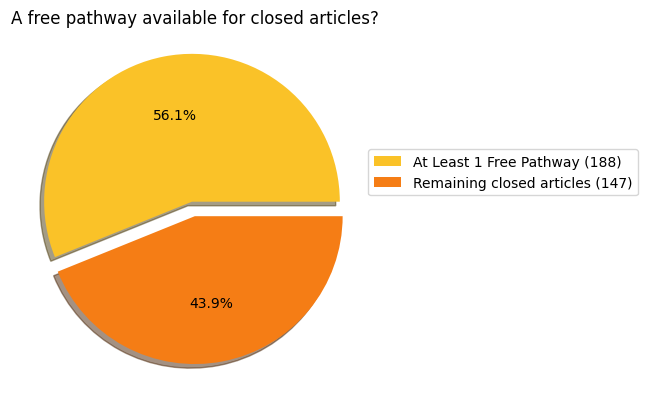

In [11]:
#at least one free pathway for closed articles
closed_articles = df[df['already_oa'] == 'no']

least_one_free_pathway = len(closed_articles[closed_articles['submitted_oa_policy'].str.contains('fee_no', case=False) \
                                | closed_articles['accepted_oa_policy'].str.contains('fee_no', case=False) \
                                | closed_articles['published_oa_policy'].str.contains('fee_no', case=False)])

total_remaining_closed = len(closed_articles) - least_one_free_pathway


legend = ["At Least 1 Free Pathway ("+str(least_one_free_pathway)+")","Remaining closed articles ("+str(total_remaining_closed)+")"]
explode = (0.1, 0.0)
plt.pie([least_one_free_pathway,total_remaining_closed],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.95,0.7))
plt.title("A free pathway available for closed articles?")

figname = "Free_Option_Closed_Articles.png"
plt.savefig(figname, bbox_inches='tight')
files.download(figname)
plt.show()


In [12]:
#top 10 sources
df.value_counts('source')[0:10]

,count
source,
Physiology,13
Academy of Management Proceedings,9
Scientific Reports,8
Journal of Sport Management,8
Journal of Sport and Exercise Psychology,8
PLoS ONE,8
Education Sciences,6
Innovation in Aging,5
Journal of the American Medical Directors Association,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

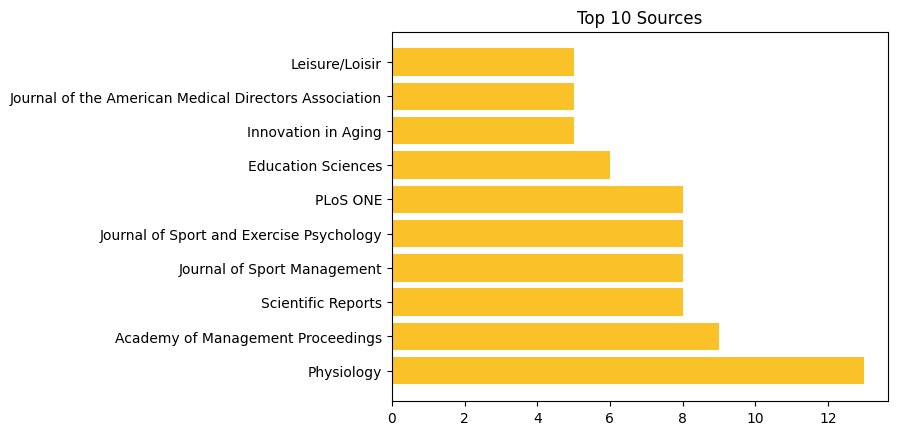

In [13]:
#Top Sources

plt.barh(df.value_counts('source')[0:10].index,df.value_counts('source')[0:10].T,color=color)
plt.title("Top 10 Sources")
figname = "Top_10_Sources.png"
plt.savefig(figname, bbox_inches='tight')
files.download(figname)
plt.show()

In [ ]:
#top 10 publishers
#df.value_counts('publisher')[0:10]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

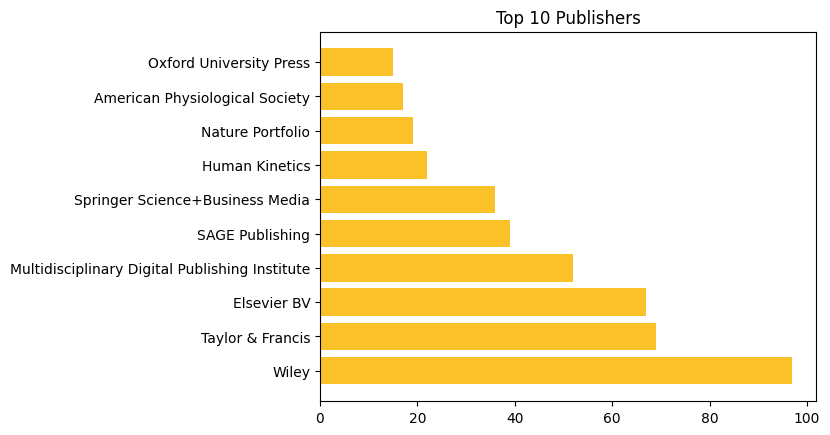

In [14]:
#top 10 publishers
plt.barh(df.value_counts('publisher')[0:10].index,df.value_counts('publisher')[0:10].T,color=color)
plt.title("Top 10 Publishers")

figname = "Top_10_Publishers.png"
plt.savefig(figname, bbox_inches='tight')
files.download(figname)
plt.show()

In [ ]:
#top 10 ORCIDS
#df.value_counts('ORCID')[0:10]

#Samples from Data set

In [ ]:
#Just a sample of what we have
df.sample(10)

# Write out to File

In [15]:
#DOI data as CSV
csv_file_name = "Brock_OpenAlex_Harvest_Start_Date_"+from_publication_date+"_to_"+to_publication_date+".csv"
print("Saving to file: "+csv_file_name)
df.to_csv(csv_file_name,index=False)
files.download(csv_file_name)

Saving to file: Brock_OpenAlex_Harvest_Start_Date_2024-07-01_to_2025-06-30.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>